# **Potato Disease Detector**
### Notebook created by--
### **Fahmid Hasan Taohid,**
### *B.Sc.Ag(Hons), Bangladesh Agricultural University, Mymensingh*

# **Installing library**

In [1]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.6 MB/s eta 0:00:00


# **Importing all libraries**

In [14]:
from fastai.vision.all import *
from fastai.vision.widgets import *

# **Mounting Google Drive to load Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Verifying Data**

In [4]:
path=Path('/content/drive/MyDrive/Grow!!/Potato')

In [5]:
failed= verify_images(get_image_files(path))
len(failed)

0

# **Creating a DataBlock**

In [6]:
potato = DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2, seed=42),
get_y=parent_label,
batch_tfms=aug_transforms(max_rotate=180)
)

# **Loading Data to Dataloaders**

In [7]:
dls= potato.dataloaders(path)

# **Viewing Data**

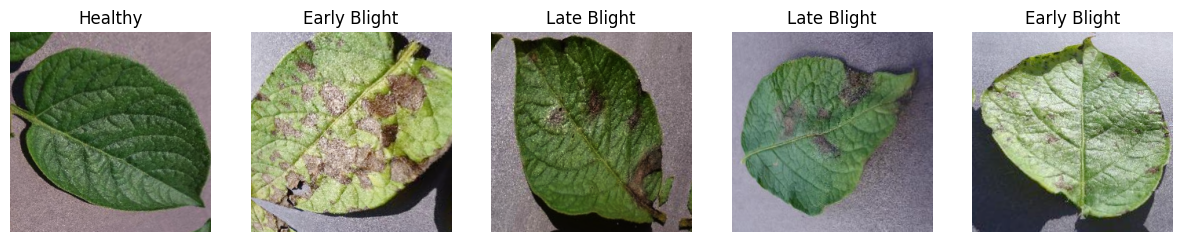

In [8]:
dls.train.show_batch(max_n=5,nrows=1)

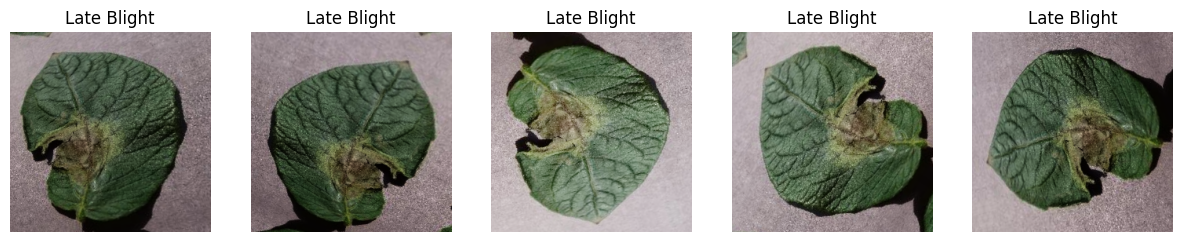

In [9]:
dls.train.show_batch(max_n=5,nrows=1,unique=True)

# **Fine tuning a pretrained model (resnet18)**

In [10]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 161MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.815452,0.119332,0.044186,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.120102,0.040895,0.023256,00:11
1,0.083456,0.026726,0.009302,00:09
2,0.053202,0.019781,0.013953,00:11
3,0.044757,0.012210,0.004651,00:11
4,0.036102,0.014091,0.006977,00:10


# **Model evaluation**

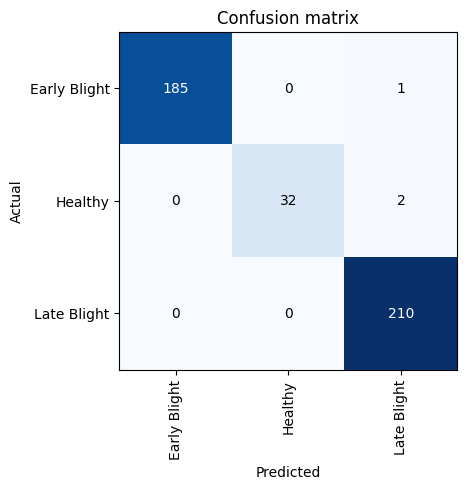

In [11]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()

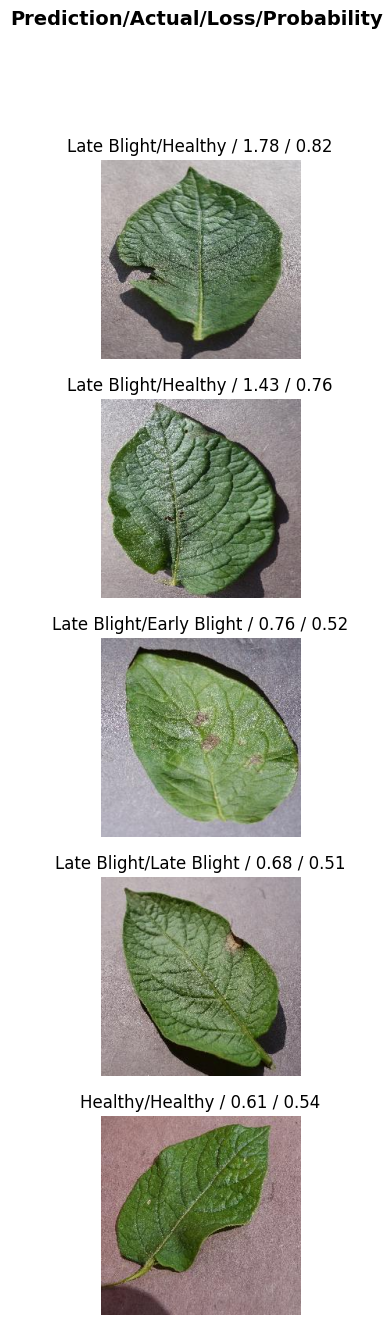

In [12]:
interpretation.plot_top_losses(5,nrows=5)

# **Exporting model as a pkl file**

In [ ]:
learn.export('model.pkl')